In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
all_hints = pd.read_csv("../data/HINTS_erdos.csv")
# all_hints =  all_hints.drop(['APP_REGION', 'PERSONID', 'HHID'], axis=1, inplace=False)

In [5]:
print(all_hints.shape)
print(all_hints.count())

(3630, 357)
HHID                3630
PERSONID            3630
Stratum             3630
APP_REGION           259
HIGHSPANLI          3630
                    ... 
AgeDX               3630
TimeSinceDX         3630
smokeStat           3630
PHQ4                3630
IncomeRanges_IMP    3630
Length: 357, dtype: int64


## **Data subset on "Cancer Attention Info + Demographic info"**


In [14]:
base_list = ['Age','BMI','CancerAttention_HealthNews','CancerAttention_Internet','CancerAttention_LocalTV','CancerAttention_NatTV','CancerAttention_OnlineNews','CancerAttention_PrintNews','CENSDIV','EducA','EverHadCancer','GenderC','HHInc','InternetCancerInfoSelf','InternetCancerInfoSite']
hints_base = pd.DataFrame(all_hints, columns = base_list)
print(hints_base.shape)

(3630, 15)


In [15]:
#set all the features with numerical values to integers  and character as categorical

# Convert numerical features to integers
numerical_features = hints_base.select_dtypes(include=['int64', 'float64']).columns
hints_base[numerical_features] = hints_base[numerical_features].astype('int32')

# Convert character features to categorical
character_features = hints_base.select_dtypes(include=['object']).columns
hints_base[character_features] = hints_base[character_features].astype('category')


In [17]:
#turn all values less than 0 to NA in integer type features
hints_base[numerical_features] = hints_base[numerical_features].map(lambda x: np.nan if x < 0 else x)
hints_base.head()

,Age,BMI,CancerAttention_HealthNews,CancerAttention_Internet,CancerAttention_LocalTV,CancerAttention_NatTV,CancerAttention_OnlineNews,CancerAttention_PrintNews,CENSDIV,EducA,EverHadCancer,GenderC,HHInc,InternetCancerInfoSelf,InternetCancerInfoSite
0,29.0,29.0,1.0,1.0,3.0,3.0,3.0,3.0,5,3.0,2.0,2.0,5.0,2.0,1.0
1,69.0,27.0,1.0,2.0,1.0,1.0,3.0,3.0,2,2.0,2.0,2.0,NaN,2.0,2.0
2,32.0,20.0,2.0,2.0,2.0,2.0,2.0,2.0,3,4.0,2.0,2.0,5.0,1.0,2.0
3,41.0,22.0,1.0,2.0,3.0,2.0,2.0,2.0,5,4.0,2.0,2.0,5.0,2.0,2.0
4,46.0,28.0,2.0,2.0,2.0,2.0,2.0,2.0,5,NaN,2.0,2.0,3.0,2.0,2.0


## **Data subset on "Medical Conditions"**


In [21]:
YourOverallHealth = (["GeneralHealth", "OwnAbilityTakeCareHealth", "MedConditions_Diabetes", "MedConditions_HighBP", "MedConditions_HeartCondition", "MedConditions_LungDisease", "MedConditions_Arthritis", "MedConditions_Depression", "SleepWorkdayHr", "SleepWorkdayMn", "SleepWeekendHr", "SleepWeekendMn", "Height_Feet", "Height_Inches", "Weight", "WeightIntention", "WeightOpinion", "LittleInterest", "Hopeless", "Nervous", "Worrying", "EmotionalSupport", "TalkHealthFriends", "HelpDailyChores"])

MedicalConditions = (["GeneralHealth", "OwnAbilityTakeCareHealth", "MedConditions_Diabetes", "MedConditions_HighBP", "MedConditions_HeartCondition", "MedConditions_LungDisease", "MedConditions_Arthritis", "MedConditions_Depression"])#, "LittleInterest", "Hopeless", "Nervous", "Worrying", "EmotionalSupport", "TalkHealthFriends", "HelpDailyChores"])


In [22]:
hints_health = all_hints[MedicalConditions]

In [26]:
#set all the features with numerical values to integers  and character as categorical

# # Convert numerical features to integers
num_features = hints_health.select_dtypes(include=['int64', 'float64']).columns
hints_health[num_features] = hints_health[num_features].astype('int32')

# Convert character features to categorical
char_features = hints_health.select_dtypes(include=['object']).columns
hints_health[char_features] = hints_health[char_features].astype('category')


### **Visualising NAs**

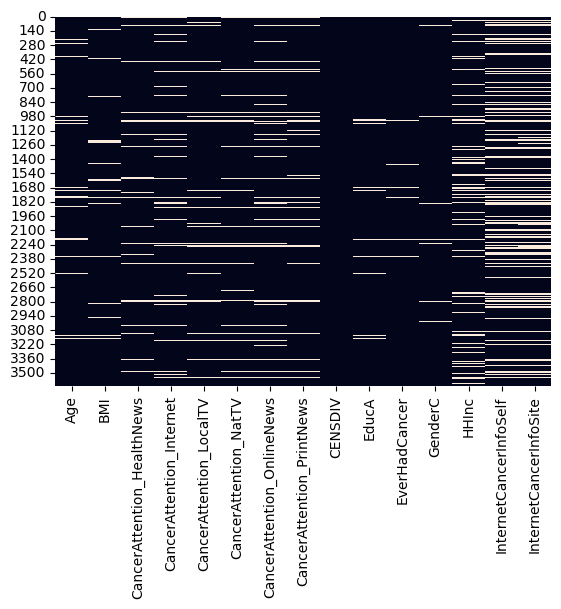

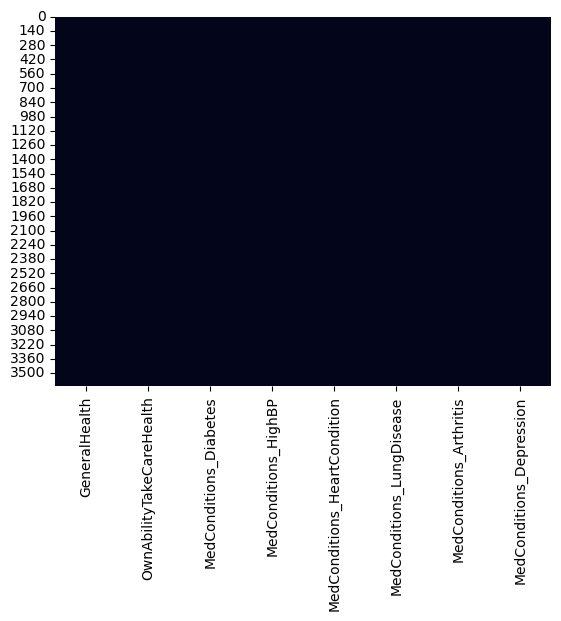

In [29]:
sns.heatmap(hints_base.isnull(), cbar=False)
plt.show()

sns.heatmap(hints_health.isnull(), cbar=False)
plt.show()

**Removing the colums with high number of missing values**

In [30]:
print(hints_base.isna().sum())
print("-----------------------------")
print(hints_health.isna().sum())

Age                           119
BMI                           178
CancerAttention_HealthNews    195
CancerAttention_Internet      272
CancerAttention_LocalTV       210
CancerAttention_NatTV         230
CancerAttention_OnlineNews    273
CancerAttention_PrintNews     250
CENSDIV                         0
EducA                          89
EverHadCancer                  31
GenderC                        68
HHInc                         480
InternetCancerInfoSelf        929
InternetCancerInfoSite        950
dtype: int64
-----------------------------
GeneralHealth                   0
OwnAbilityTakeCareHealth        0
MedConditions_Diabetes          0
MedConditions_HighBP            0
MedConditions_HeartCondition    0
MedConditions_LungDisease       0
MedConditions_Arthritis         0
MedConditions_Depression        0
dtype: int64


In [31]:
print(hints_base.InternetCancerInfoSelf.isna().sum())
print(hints_base.InternetCancerInfoSite.isna().sum())
# print(hints_base.HHInc.isna().sum())

929
950


In [34]:
hints_base = hints_base.drop(['InternetCancerInfoSelf', 'InternetCancerInfoSite'], axis=1, inplace=False)
#investigat whether to drop HHInc

In [35]:
print(hints_base.shape)
print(hints_health.shape)

(3630, 13)
(3630, 8)


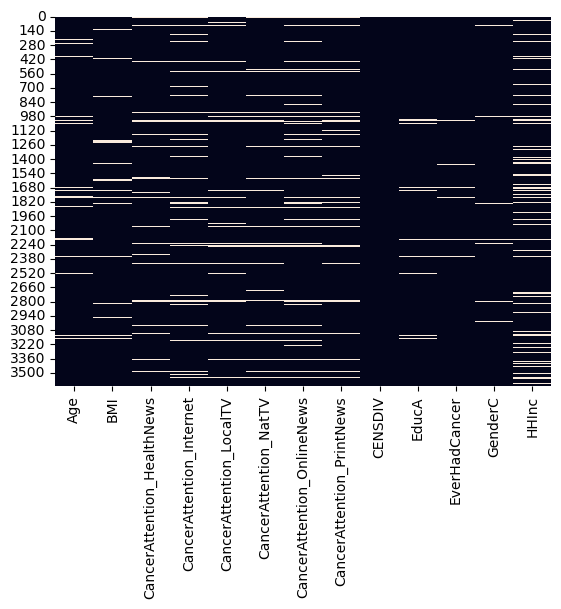

In [36]:
sns.heatmap(hints_base.isnull(), cbar=False)
plt.show()

In [49]:
hints_final = pd.concat([hints_base, hints_health], axis=1)


In [50]:
print(hints_final.shape)
hints_final.head()

(3630, 21)


,Age,BMI,CancerAttention_HealthNews,CancerAttention_Internet,CancerAttention_LocalTV,CancerAttention_NatTV,CancerAttention_OnlineNews,CancerAttention_PrintNews,CENSDIV,EducA,...,GenderC,HHInc,GeneralHealth,OwnAbilityTakeCareHealth,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Arthritis,MedConditions_Depression
0,29.0,29.0,1.0,1.0,3.0,3.0,3.0,3.0,5,3.0,...,2.0,5.0,2,1,2,2,2,2,2,1
1,69.0,27.0,1.0,2.0,1.0,1.0,3.0,3.0,2,2.0,...,2.0,NaN,2,1,2,1,2,2,1,1
2,32.0,20.0,2.0,2.0,2.0,2.0,2.0,2.0,3,4.0,...,2.0,5.0,2,2,2,2,2,1,2,2
3,41.0,22.0,1.0,2.0,3.0,2.0,2.0,2.0,5,4.0,...,2.0,5.0,2,2,2,2,2,2,2,2
4,46.0,28.0,2.0,2.0,2.0,2.0,2.0,2.0,5,NaN,...,2.0,3.0,3,2,2,1,2,2,2,2


In [51]:
def missingValues(missingvalues):
    if (missing_values > 0).any():
        columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
        print("Columns with missing values: \n", columns_with_missing_values)
    else:
        print("No columns have missing values.")
    return

missing_values = hints_final.isna().sum()
missingValues(missing_values)

# hints_final = hints_final.dropna()
# missingValues(hints_final.isna().sum())


Columns with missing values: 
 ['Age', 'BMI', 'CancerAttention_HealthNews', 'CancerAttention_Internet', 'CancerAttention_LocalTV', 'CancerAttention_NatTV', 'CancerAttention_OnlineNews', 'CancerAttention_PrintNews', 'EducA', 'EverHadCancer', 'GenderC', 'HHInc']


In [59]:
hints_final = hints_final.dropna()
print(hints_final.shape)

missing_values = hints_final.isna().sum()
missingValues(missing_values)


(2678, 21)
No columns have missing values.


In [60]:
hints_final.to_csv("final_hints_dataset.csv")

# Feature Ranking Process

In [107]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree


In [74]:
#newFeatures = (["UseInternet", "Internet_DialUp", "Internet_BroadBnd", "Internet_Cell", "Internet_WiFi", "Internet_Other", "InternetCancerInfoSelf", "InternetCancerInfoSite"])
#hints_UIFI_New = hints_UIFI[newFeatures]
#hints_UIFI_New


In [88]:
X,y = hints_final.drop("EverHadCancer", axis=1), hints_final.EverHadCancer

In [92]:
print(X.shape, y.shape, sep='\n')

(2678, 20)
(2678,)


In [223]:
random_state_ = 0
estimator1 = LinearSVC(C=1000, max_iter=100000, dual=True)
estimator2 = DecisionTreeClassifier(max_depth = 6, random_state=random_state_)

estimators = [estimator1]
estimators.extend([estimator2])

estimators.extend([
    LogisticRegression(max_iter=100000),
    RandomForestClassifier(n_estimators=5, random_state=random_state_)
])
estimators

[LinearSVC(C=1000, dual=True, max_iter=100000),
 DecisionTreeClassifier(max_depth=6, random_state=0),
 LogisticRegression(max_iter=100000),
 RandomForestClassifier(n_estimators=5, random_state=0)]

## Finding top10 Features

In [121]:
# finding top10 Features
selectors = []
selected_features = []
for estimator in estimators:
    # Apply RFE to the LinearSVC model
    selector = RFE(estimator=estimator, n_features_to_select=10, step=1)
    
    # Create a pipeline with StandardScaler and RFE selector
    pipeline = make_pipeline(StandardScaler(), selector)
    
    # Fit the pipeline to the training data
    pipeline.fit(X, y)
    # Evaluate the model
    
    print("accuracy:", pipeline.score(X, y))
    
    # Append the fitted selector to the list
    selectors.append(selector)
    # Get the selected features and store them
    selected_features.append(X.columns[selector.support_])



/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/

accuracy: 0.8793876026885735
accuracy: 0.8965646004480956
accuracy: 0.880134428678118
accuracy: 0.9757281553398058


In [124]:
# Display results for each selector
for idx, selector in enumerate(selectors):
    print(f"Estimator {idx+1}: {estimators[idx]}")
    feature_ranking =  selector.ranking_
    # print("Selected features:", selector.support_)
    print("Feature ranking:", feature_ranking)
    print(X.columns[selector.support_])
    # Get the indices of the sorted features
    sorted_indices = np.argsort(feature_ranking)
    # Print column names based on sorted indices
    for idx in sorted_indices:
        print(X.columns[idx])
    print("")




# # Plotting decision trees for each estimator
# for idx, estimator in enumerate(estimators):
#     # Assuming estimator is a DecisionTreeClassifier
#     plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
#     plot_tree(estimator, filled=True, feature_names=selected_features[idx], class_names=True)
#     plt.show()

Estimator 1: LinearSVC(C=1000, dual=True, max_iter=100000)
Feature ranking: [ 1  1 11  1  1  1  4  3  9  1  8  7  1  6  1  2  1  1 10  5]
Index(['Age', 'BMI', 'CancerAttention_Internet', 'CancerAttention_LocalTV',
       'CancerAttention_NatTV', 'EducA', 'GeneralHealth',
       'MedConditions_Diabetes', 'MedConditions_HeartCondition',
       'MedConditions_LungDisease'],
      dtype='object')
Age
MedConditions_LungDisease
MedConditions_HeartCondition
MedConditions_Diabetes
GeneralHealth
EducA
CancerAttention_LocalTV
CancerAttention_Internet
BMI
CancerAttention_NatTV
MedConditions_HighBP
CancerAttention_PrintNews
CancerAttention_OnlineNews
MedConditions_Depression
OwnAbilityTakeCareHealth
HHInc
GenderC
CENSDIV
MedConditions_Arthritis
CancerAttention_HealthNews

Estimator 2: DecisionTreeClassifier(max_depth=6, random_state=0)
Feature ranking: [ 1  1  1 11  7  8  1  4  1  1 10  1  1  1  9  5  1  2  3  6]
Index(['Age', 'BMI', 'CancerAttention_HealthNews',
       'CancerAttention_OnlineNews

In [141]:
# finding top10 Features
selectors = []
selected_features = []
for estimator in estimators:
    # Apply RFE to the LinearSVC model
    selector = RFE(estimator=estimator, n_features_to_select=1, step=1)
    
    # Create a pipeline with StandardScaler and RFE selector
    pipeline = make_pipeline(StandardScaler(), selector)
    
    # Fit the pipeline to the training data
    pipeline.fit(X, y)
    # Evaluate the model
    
    print("accuracy:", pipeline.score(X, y))
    
    # Append the fitted selector to the list
    selectors.append(selector)
    # Get the selected features and store them
    selected_features.append(X.columns[selector.support_])



/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/

accuracy: 0.8793876026885735
accuracy: 0.8797610156833457
accuracy: 0.878267363704257
accuracy: 0.8790141896938013
Estimator 1: LinearSVC(C=1000, dual=True, max_iter=100000)
Feature ranking: [ 1  5 20  6  7  9 11 12 14 16 18  4  3 13 10 15  2 17 19  8]
Index(['Age'], dtype='object')
Age
MedConditions_HeartCondition
GeneralHealth
HHInc
BMI
CancerAttention_Internet
CancerAttention_LocalTV
MedConditions_Depression
CancerAttention_NatTV
MedConditions_Diabetes
CancerAttention_OnlineNews
CancerAttention_PrintNews
OwnAbilityTakeCareHealth
CENSDIV
MedConditions_HighBP
EducA
MedConditions_LungDisease
GenderC
MedConditions_Arthritis
CancerAttention_HealthNews

Estimator 2: DecisionTreeClassifier(max_depth=6, random_state=0)
Feature ranking: [ 1  2  5 20 16 17  9 13  3  7 19  4 10  6 18 14  8 11 12 15]
Index(['Age'], dtype='object')
Age
BMI
CENSDIV
HHInc
CancerAttention_HealthNews
OwnAbilityTakeCareHealth
EducA
MedConditions_HeartCondition
CancerAttention_OnlineNews
GeneralHealth
MedConditions_Lu

In [149]:
# Display results for each selector
estimator_feature_rankings = {}
for idx, selector in enumerate(selectors):
    print(f"Estimator {idx+1}: {estimators[idx]}")
    feature_ranking =  selector.ranking_
    # print("Selected features:", selector.support_)
    print("Feature ranking:", feature_ranking)
    estimator_feature_rankings[f"Estimator {idx+1}"] = feature_ranking

cumulative_rankings = defaultdict(int)

# Accumulate rankings for each feature across all estimators
for rankings in estimator_feature_rankings.values():
    for idx, ranking in enumerate(rankings):
        cumulative_rankings[idx] += ranking

# Calculate the average ranking for each feature
num_estimators = len(estimator_feature_rankings)
average_rankings = {idx: total_ranking / num_estimators for idx, total_ranking in cumulative_rankings.items()}

# Select the top 10 features based on average ranking
top_i = 15
top_features = sorted(average_rankings, key=average_rankings.get)[:top_i]

# Output the selected features
print(f"Top {top_i} features based on average ranking:")
for feature_idx in top_features:
    print(X.columns[feature_idx])

Estimator 1: LinearSVC(C=1000, dual=True, max_iter=100000)
Feature ranking: [ 1  5 20  6  7  9 11 12 14 16 18  4  3 13 10 15  2 17 19  8]
Estimator 2: DecisionTreeClassifier(max_depth=6, random_state=0)
Feature ranking: [ 1  2  5 20 16 17  9 13  3  7 19  4 10  6 18 14  8 11 12 15]
Estimator 3: LogisticRegression(max_iter=100000)
Feature ranking: [ 1  4 18  5  6  8 12 11 17 10 20  3  2 15  7 13 19 16 14  9]
Estimator 4: RandomForestClassifier(n_estimators=5, random_state=0)
Feature ranking: [ 1  2  5 13 12  9 11  8  3 10 16  4  6  7 20 15 17 18 19 14]
Top 15 features based on average ranking:
Age
BMI
HHInc
GeneralHealth
CENSDIV
CancerAttention_LocalTV
OwnAbilityTakeCareHealth
CancerAttention_NatTV
CancerAttention_OnlineNews
EducA
CancerAttention_Internet
CancerAttention_PrintNews
MedConditions_HeartCondition
MedConditions_Depression
CancerAttention_HealthNews


In [29]:
#ct = pd.crosstab(hints_YOH['Internet_DialUp'], hints_YOH['EverHadCancer'], normalize='index')
#print(ct)

## Fitting a classifier on top i features

### Addressing UnbalancedNess

In [30]:
from sklearn.model_selection import train_test_split

In [257]:
## tentative approach -- just place holder

# Get the indices of the top i features

top_indices = np.argsort(top_features)[:top_i]

# Select the top 10 features of X and create a new DataFrame
new_dataset_X = X.iloc[:, top_indices].copy()
new_dataset_Y = y.copy()

print(new_dataset_X.shape,new_dataset_Y.shape, sep='\n')
new_dataset = pd.concat([new_dataset_X, new_dataset_Y],axis = 1)

(2678, 15)
(2678,)


#### estimators

In [178]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset_X, new_dataset_Y,
                                            shuffle=True,
                                            random_state=random_state_,
                                            stratify=y)

In [ ]:
print(estimators)
estimator_names = ['LinearSVC','DecisionTree', 'LogisticRegression', 'RandomFoerest']

knn_pipe = Pipeline([('scale', StandardScaler()),('knn', KNeighborsClassifier(5))])
estimators.extend([knn_pipe])
estimator_names.extend(['knn'])
print(estimators)

## Decide on undersampled data or oversampling

###  Decide on undersampled data 

In [261]:
### Class balancing
# class_count_0, class_count_1 = y_train.value_counts()
# print(class_count_0, class_count_1)

### Class balancing
class_count_0, class_count_1 = new_dataset.EverHadCancer.value_counts()
print(class_count_0, class_count_1)

2355 323


In [262]:
class_0 = new_dataset[new_dataset['EverHadCancer'] == 2]
class_1 = new_dataset[new_dataset['EverHadCancer'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2355, 16)
class 1: (323, 16)


In [265]:
# undersampled_train = pd.concat([X_train, y_train],axis = 1)
# # undersampled_train
class_0_under = class_0.sample(class_count_1)
balanced_undersampled = pd.concat([class_0_under, class_1], axis=0)
balanced_undersampled.shape
# balanced_train.EverHadCancer.value_counts()

check_0 = balanced_undersampled[balanced_undersampled['EverHadCancer'] == 2]
check_1 = balanced_undersampled[balanced_undersampled['EverHadCancer'] == 1]
print('class 0:', check_0.shape)
print('class 1:', check_1.shape)

class 0: (323, 16)
class 1: (323, 16)


### Decide on oversampling 

In [266]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Example data

# Showing the original class distribution
print("Original class distribution:", Counter(new_dataset_Y))

# Define the oversampling strategy
ros = RandomOverSampler(random_state=random_state_)

# Fit and apply the transform
X_oversampled, y_oversampled = ros.fit_resample(new_dataset_X, new_dataset_Y)

# Showing the new class distribution
print("Resampled class distribution:", Counter(y_oversampled))
print(new_dataset_X.shape)
# 2355+323

Original class distribution: Counter({2.0: 2355, 1.0: 323})
Resampled class distribution: Counter({2.0: 2355, 1.0: 2355})
(2678, 15)


2678

## Decide on classifiers

#### import func

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

def accuracy_score_m(true, predicted):
    return np.sum(true==predicted)/len(predicted)


## make the kfold object
kfold = StratifiedKFold(n_splits=5,
                           shuffle=True,
                           random_state=111)

### train_test_split undersamples

In [268]:
balanced_train, balanced_test = train_test_split(balanced_undersampled, shuffle=True, test_size = 0.2,
                                            random_state=random_state_)

print(balanced_train.shape, balanced_test.shape)

(516, 16) (130, 16)


### train_test_split oversamples

In [269]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversampled, y_oversampled, test_size = 0.2,
                                            shuffle=True,
                                            random_state=random_state_)
print(X_train_over.shape, X_test_over.shape)

(3768, 15) (942, 15)


### Kfold for undersampling

In [251]:
results = {}

for estimator, name in zip(estimators, estimator_names):

    accuracies = []
    for train_index, test_index in kfold.split(balanced_train.iloc[:,:-1], balanced_train.EverHadCancer):
        X_train, X_test = balanced_train.iloc[:,:-1].iloc[train_index], balanced_train.iloc[:,:-1].iloc[test_index]
        y_train, y_test = balanced_train.EverHadCancer.iloc[train_index], balanced_train.EverHadCancer.iloc[test_index]

        # Fit RFE and transform the datasets
        # X_train_rfe = selector.fit_transform(X_train, y_train)
        # X_test_rfe = selector.transform(X_test)

        # Fit the model on the reduced feature set
        estimator.fit(X_train, y_train)
        predictions = estimator.predict(X_test)
        accuracy = accuracy_score_m(y_test, predictions)
        # print(accuracy)
        accuracies.append(accuracy)
    av_accuracies = np.mean(accuracies)

    results[name] = av_accuracies

print("DONE")

/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DONE


In [252]:
for name, accuracies in results.items():
    print(name, ' : ', accuracies)


LinearSVC  :  0.5412371134020619
DecisionTree  :  0.6032431271477663
LogisticRegression  :  0.6714561855670103
RandomFoerest  :  0.6073238831615121
knn  :  0.6178694158075602


### Kfold for oversamples

In [253]:
results = {}

for estimator, name in zip(estimators, estimator_names):

    accuracies = []
    for train_index, test_index in kfold.split(X_train_over, y_train_over):
        X_train, X_test = X_train_over.iloc[train_index], X_train_over.iloc[test_index]
        y_train, y_test = y_train_over.iloc[train_index], y_train_over.iloc[test_index]

        # Fit RFE and transform the datasets
        # X_train_trans = estimator.fit_transform(X_train, y_train)
        # X_test_trans = estimator.transform(X_test)

        # Fit the model on the reduced feature set
        estimator.fit(X_train, y_train)
        predictions = estimator.predict(X_test)
        accuracy = accuracy_score_m(y_test, predictions)
        # print(accuracy)
        accuracies.append(accuracy)
    av_accuracies = np.mean(accuracies)

    results[name] = av_accuracies

print("DONE")

/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DONE


In [254]:
for name, accuracies in results.items():
    print(name, ' : ', accuracies)


LinearSVC  :  0.6333860905313518
DecisionTree  :  0.7449030536400464
LogisticRegression  :  0.7015907296921517
RandomFoerest  :  0.9269566576244836
knn  :  0.7921922018183202


# Do hyperparameter Tuning